In [1]:
%matplotlib inline

In [94]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.axes as maxes
import matplotlib.colors as mcolors
import matplotlib.patheffects as path_effects
import matplotlib.patches as mpatches
import numpy as np

from papercolors import colordict as pcd

paper_path = Path('../figures/')

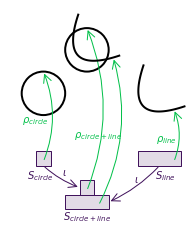

In [341]:
fig, ax = plt.subplots(figsize=(4,4))



t=np.linspace(-1,1,100);
X=(-np.sqrt(2)/2)*(t*(1-t))-.3
Y=(np.sqrt(2)/2)*(t*(1+t))-.2


lw = 2

r = .75
for (x,y) in [(0,0), (-1.5, -1.5)]:
    ax.add_artist(mpatches.Circle((x,y), radius=r, lw=lw, edgecolor='black', fill=None))
    
for (x,y) in [(0,0), (2.25, 1.75)]:
    ax.plot(X+x,Y-y, color='k', lw=lw)

box = [(-1.5-(.5/2),-4), (-.25,-5)]
for (x,y) in box:
    ax.add_artist(mpatches.Rectangle((x,y), .5, .5, edgecolor=pcd['base'], facecolor=mcolors.to_rgba(pcd['base'], alpha=.15)))
    
rect = [(1.75, -4), (-.75, -5.5)]
for (x,y) in rect:
    ax.add_artist(mpatches.Rectangle((x,y), 1.5, .5, edgecolor=pcd['base'], facecolor=mcolors.to_rgba(pcd['base'], alpha=.15)))

ax.set(aspect='equal', xlim=(-2.75, 3.5), ylim=(-6,1.5))


labels = {3: r'$\rho_{circle}$', 2:r'$\rho_{line}$', 1:r'$\rho_{circle+line}$'}
off = {3:.2,2: .1, 1:.31}
for i, (s,t) in enumerate([((0,-4.85),(-.75*np.cos(np.pi/2),.75*np.sin(np.pi/2))),
                           ((X[5]-.5,-5.35),(X[5],Y[5])), 
                           ((X[9]+2.25,-3.85),(X[9]+2.25,Y[9]-1.75)), 
                           ((-1.5, -3.85), (-.75*np.cos(np.pi/2)-1.5, -.75*np.sin(np.pi/2)))]):
    arr = mpatches.FancyArrowPatch(s,t, color=pcd['section'],
                                     connectionstyle='arc3,rad=.2', arrowstyle='->', mutation_scale=20)
    ax.add_artist(arr)
    mid = s[1]+(t[1]-s[1])/2
    if i!=0:
        ax.text(t[0]+ off[i], mid-.2, labels[i], color=pcd['section'], ha='right')
        
for i, (s, t) in enumerate([[(rect[0][0]+1.5/2, rect[0][1]), (rect[1][0]+1.5, rect[1][1]+.25)],
                         [(box[0][0]+.25, box[0][1]), (box[1][0],box[1][1]+.25)]]):
    
    cs = ['arc3,rad=-.1','arc3,rad=.1']
    arr = mpatches.FancyArrowPatch(s,t, color=pcd['base'],
                                     connectionstyle=cs[i], arrowstyle='->', mutation_scale=20)
    
    ax.add_artist(arr)
    tx = s[0]+(t[0]-s[0])/2
    ty = s[1]+(t[1]-s[1])/2
    ax.text(tx, ty+.05, r'$\iota$', color=pcd['base'])
    label = [r'$S_{line}$', r'$S_{circle}$']
    off = [.2, -.1]
    ax.text(s[0]+off[i], s[1]-.1, label[i], color=pcd['base'], va='top', ha='center')
    
ax.text(0,-5.5, r'$S_{circle+line}$', color=pcd['base'], va='top', ha='center')
ax.axis('off')
fig.savefig(paper_path/"qcom.png", bbox_inches='tight', dpi=200)
    